# Vellore Institute of Technology

# School of Computer Science and Engineering

# M.tech Data Science

# Name: Suriya Narayanan S

# Reg.no: 20MID0059

# Campus : Vellore

# Date: 22-05-2023

# ADS Assignment -2

### 1. Importing all the required Libraries:

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### 2. Loading the Dataset

In [62]:
Titanic = pd.read_csv("D:/Datasets/titanic.csv")

In [63]:
int64_col = Titanic.select_dtypes(include = 'int64')
print("Integer Columns: ", int64_col.columns.to_list())
float64_col = Titanic.select_dtypes(include = 'float64')
print("Float Columns : ", float64_col.columns.to_list())
object_col = Titanic.select_dtypes(include = 'object')
print("Object Columns : ", object_col.columns.to_list())

Integer Columns:  ['survived', 'pclass', 'sibsp', 'parch']
Float Columns :  ['age', 'fare']
Object Columns :  ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


## 3. Performing the visualisations:

### Univariate Analysis :
      Histogram
      Pie Chart

#### Histogram

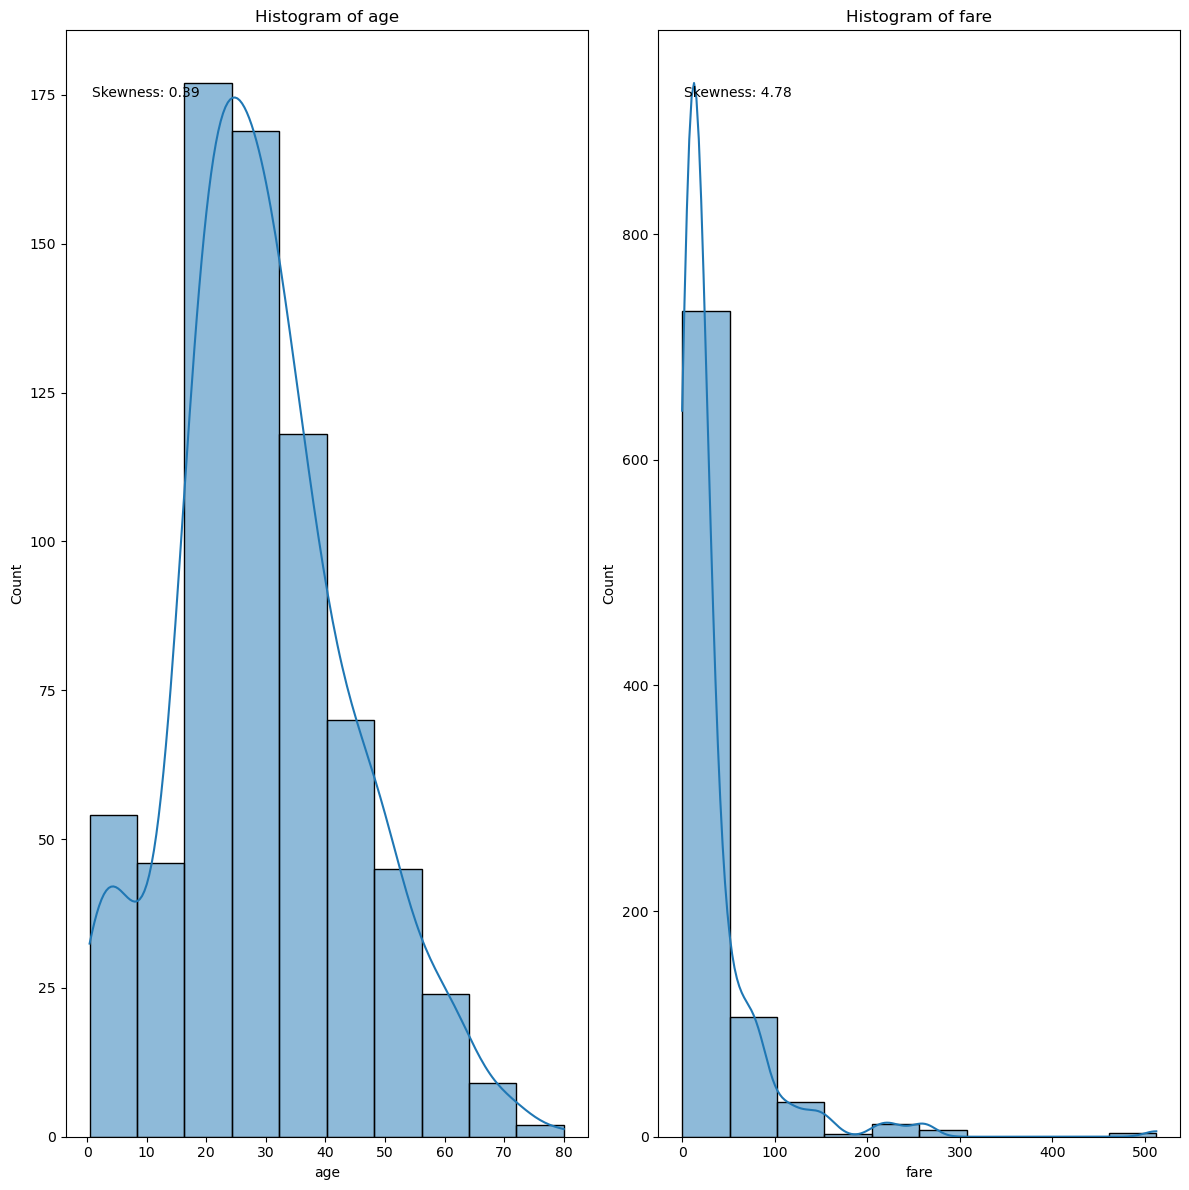

In [64]:
num_plots = len(float64_col)
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(float64_col):
    if i < num_rows * num_cols:
        ax = axes[i]
        sns.histplot(data=Titanic, x=column, bins=10, stat='count', ax=ax, kde =True)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Histogram of {column}')
        skewness = skew(Titanic[column].dropna())
        skewness_text = f'Skewness: {skewness:.2f}'
        ax.text(0.05, 0.95, skewness_text, transform=ax.transAxes, fontsize=10, verticalalignment='top')        
    else:
        break
fig.tight_layout()
plt.show()

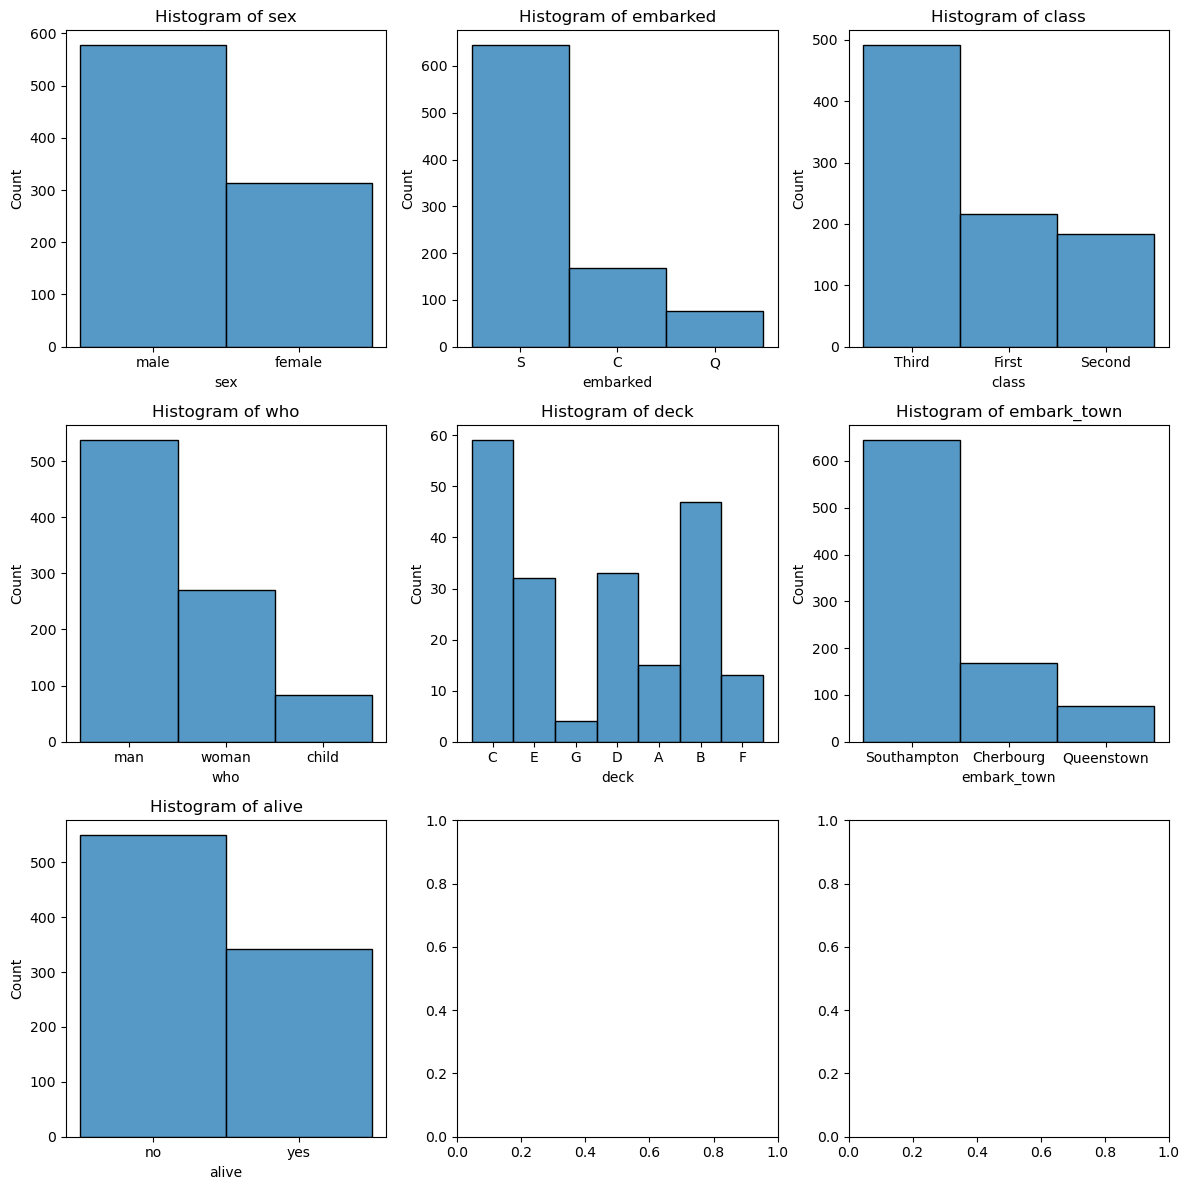

In [65]:
num_plots = len(object_col)
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()
for i, column in enumerate(object_col):
    if i < num_rows * num_cols:
        ax = axes[i]
        sns.histplot(data=Titanic, x=column, bins=10, stat='count', ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Histogram of {column}')
    else:
        break
fig.tight_layout()
plt.show()

#### Pie chart

<Axes: ylabel='sex'>

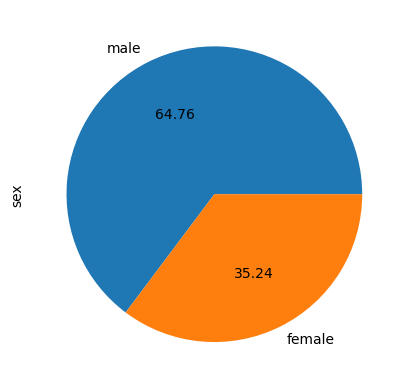

In [66]:
Titanic["sex"].value_counts().plot(kind='pie',autopct="%.2f")

### Bivariate Analysis:
    Scatter plot
    Bar plot

#### Scatter plot and bar plot

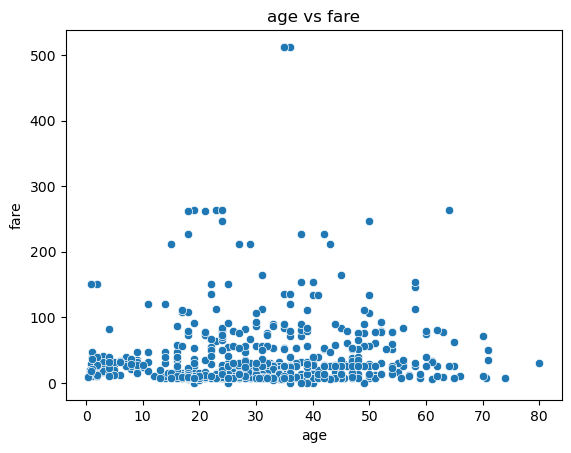

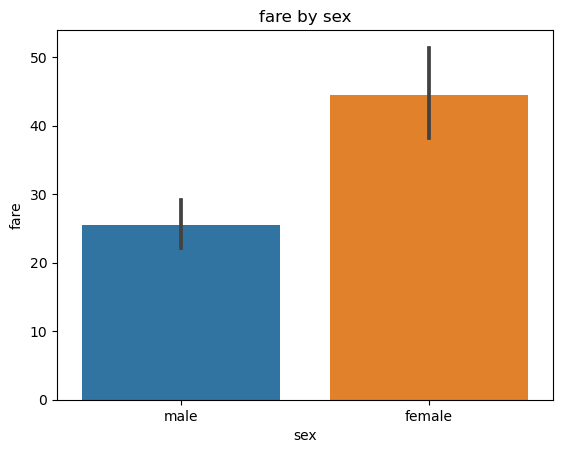

In [67]:
variable1 = 'age'
variable2 = 'fare'
variable3 = 'sex'

# Scatter plot of age vs fare
sns.scatterplot(data=Titanic, x=variable1, y=variable2)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title(f'{variable1} vs {variable2}')
plt.show()

# Bar plot of sex vs fare
sns.barplot(data=Titanic, x=variable3, y=variable2)
plt.xlabel(variable3)
plt.ylabel(variable2)
plt.title(f'{variable2} by {variable3}')
plt.show()

### Multivariate Analysis:
1. Joint Plot:
2. Catplot:
3. PairPlot:
4. Heatmap:

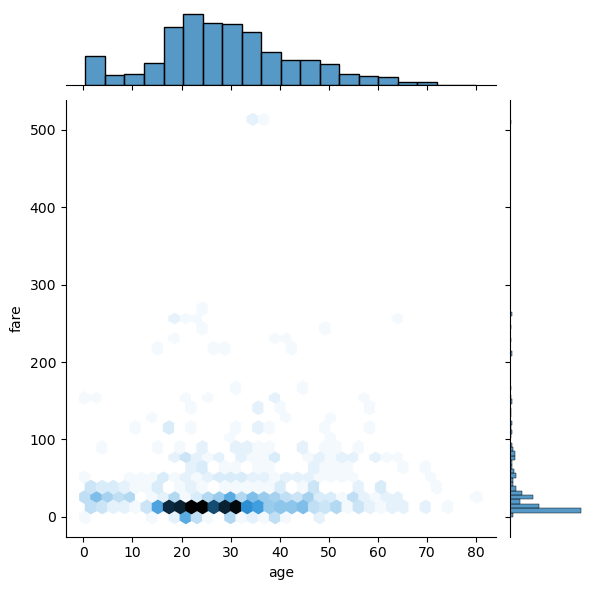

In [68]:
#Joint plot
sns.jointplot(x='age', y='fare', data = Titanic, kind='hex')

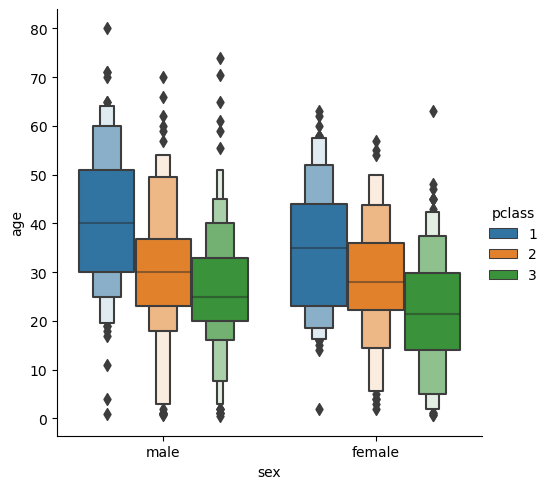

In [69]:
#catplot
sns.catplot(x='sex', y='age', data=Titanic, kind='boxen', hue='pclass')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


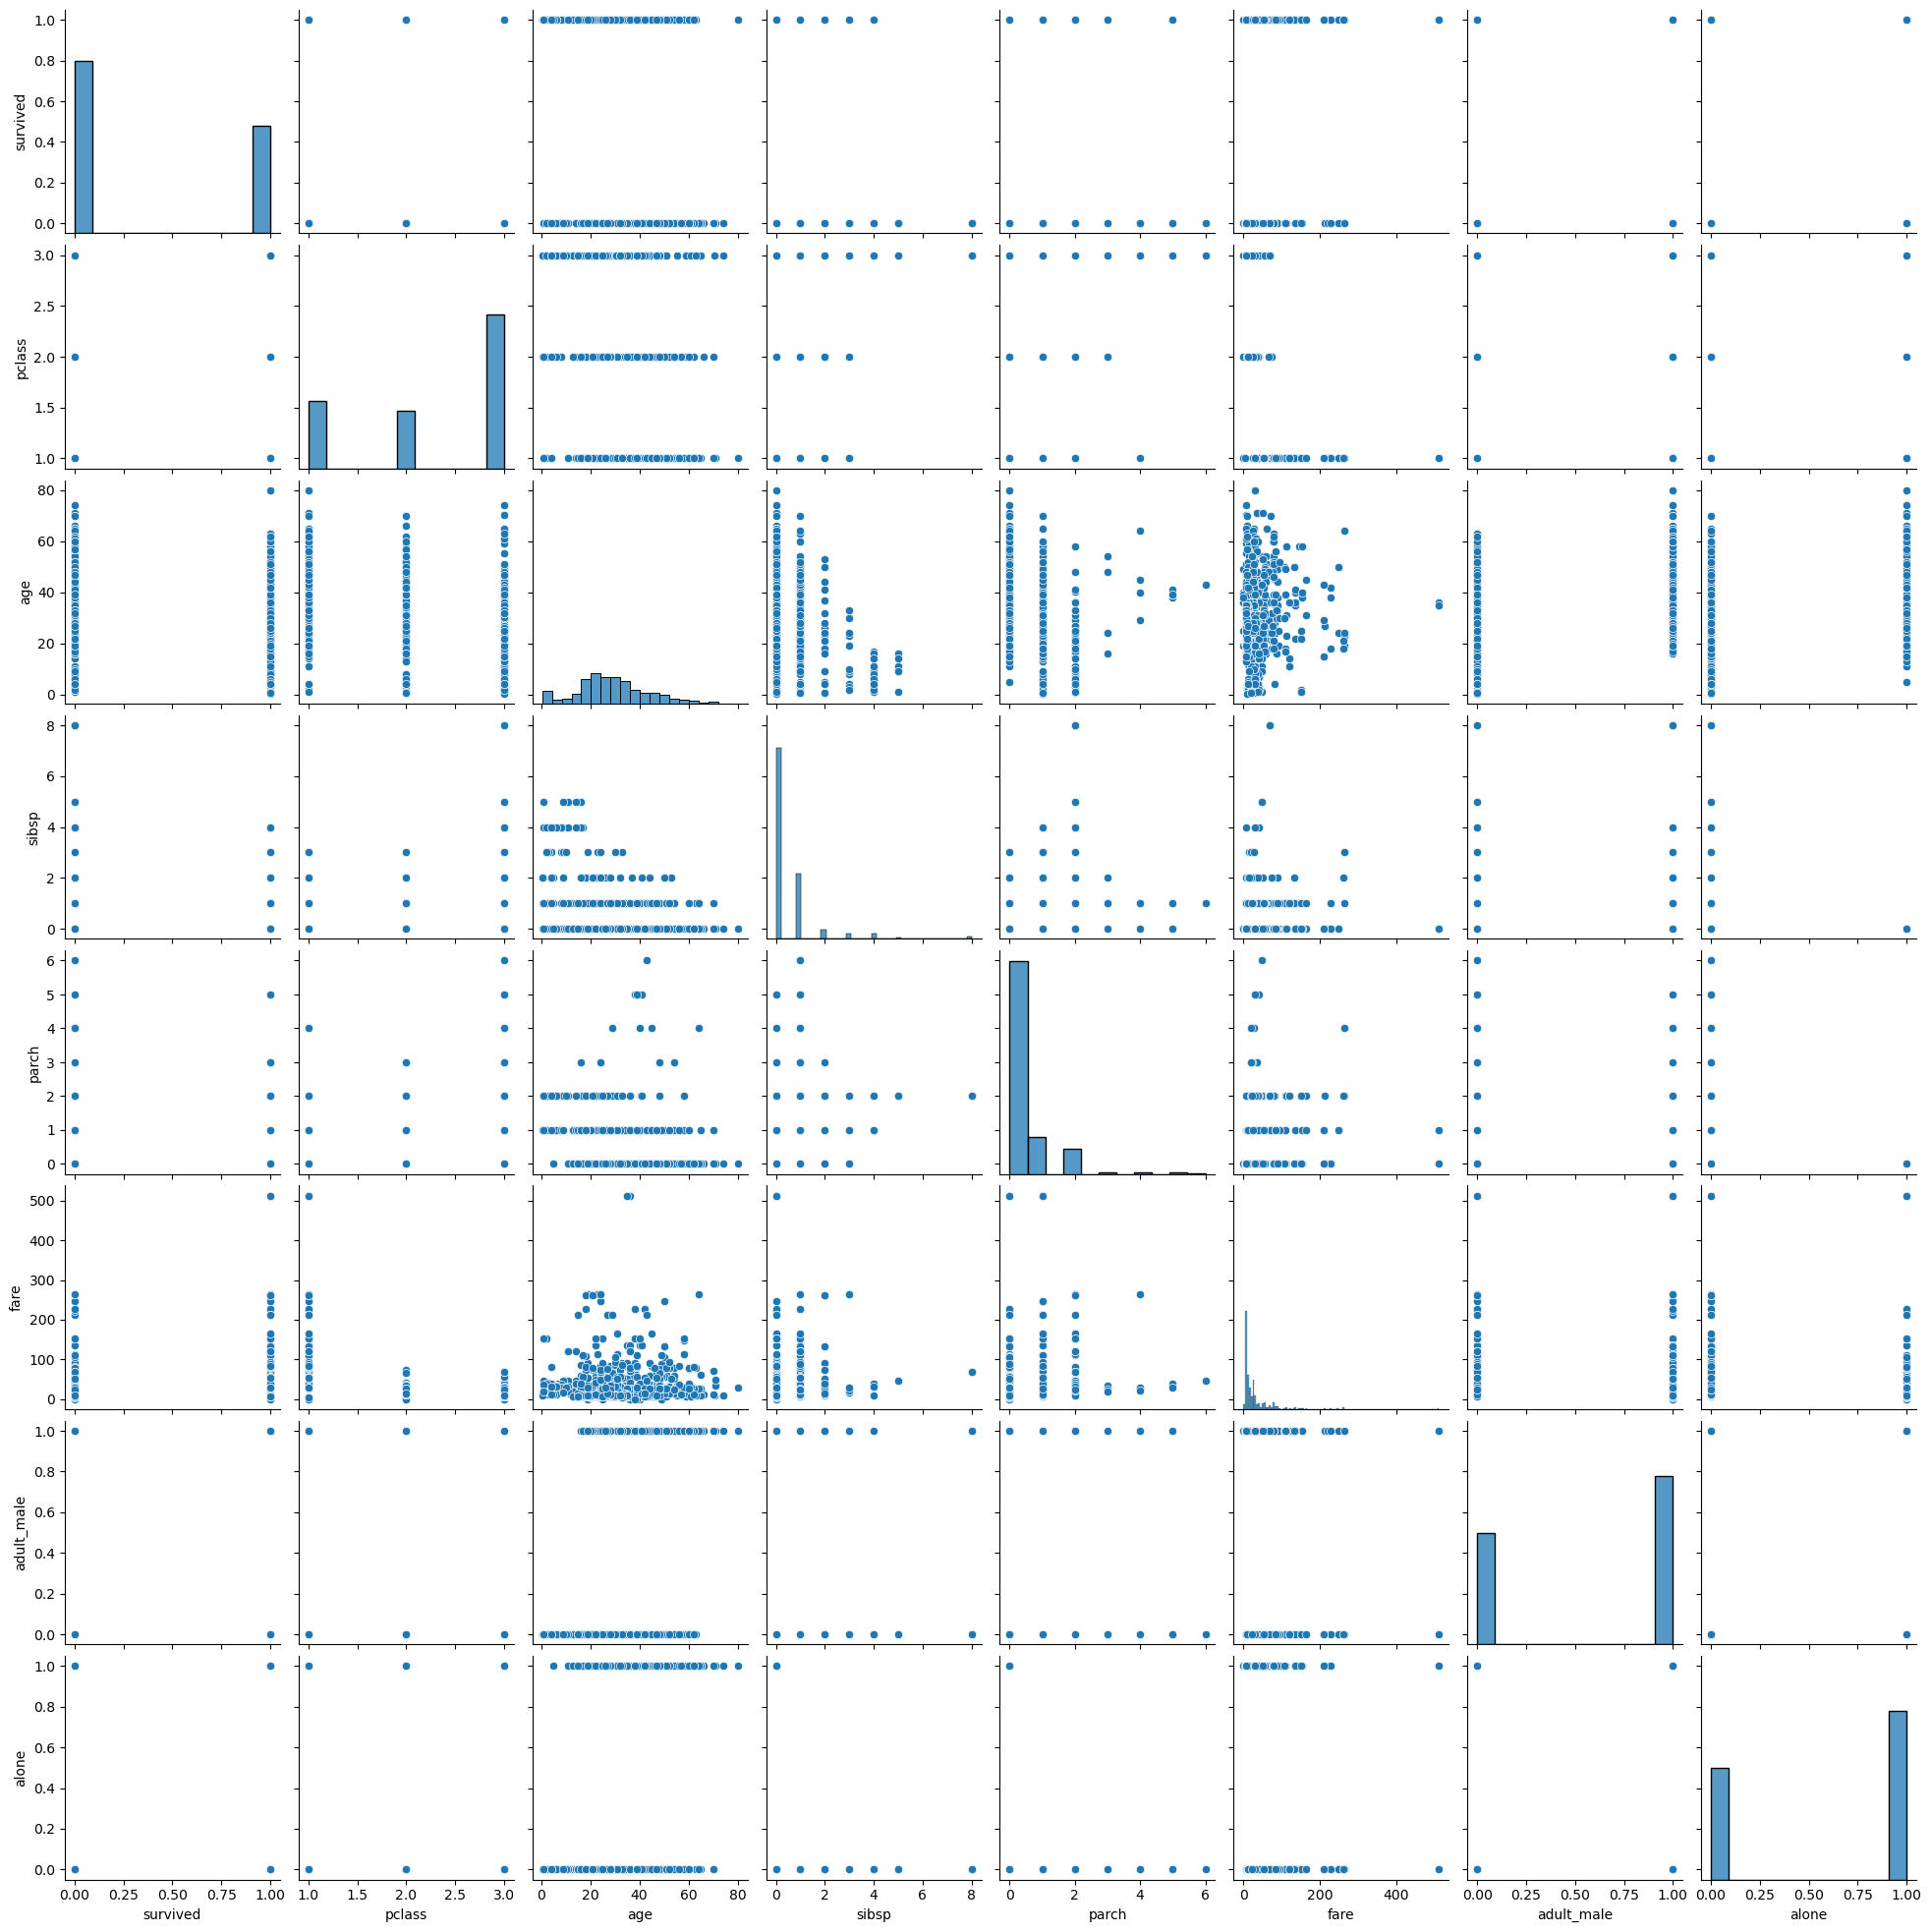

In [70]:
# Pair plot
sns.pairplot(Titanic)

C:\Users\GURU\AppData\Local\Temp\ipykernel_10132\1995508684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Titanic.corr()#["Survived"]


Text(0.5, 1.0, 'Correlation between features')

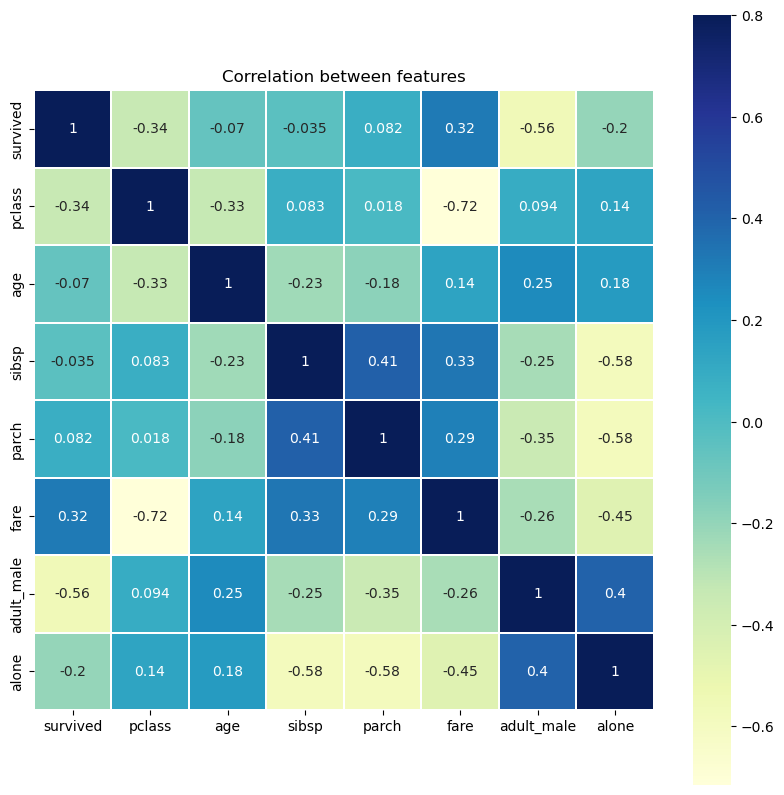

In [39]:
# heat plot
corr=Titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

<Axes: >

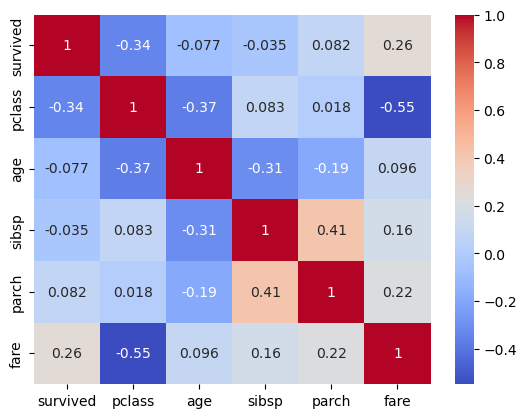

In [72]:
numeric_columns = Titanic.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### 4. Perform Descriptive statistics:

In [73]:
Titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
for column in float64_col:
    quantile = Titanic[column].quantile(q=[0.25, 0.75])
    print(f"Quantile values for column '{column}':")
    print(quantile)
    
    q1 = quantile.iloc[0]
    q3 = quantile.iloc[1]
    IQR = q3 - q1
    
    print(f"Interquartile Range (IQR) for column '{column}': {IQR}")
    lower_extreme=quantile.iloc[1]-(1.5* IQR)
    print("Lower Extreme : ", lower_extreme)
    upper_extreme=quantile.iloc[0]+(1.5*IQR)
    print("Upper Extreme : ", upper_extreme,"\n")
for column in int64_col:
    quantile = Titanic[column].quantile(q=[0.25, 0.75])
    print(f"Quantile values for column '{column}':")
    print(quantile)
    
    q1 = quantile.iloc[0]
    q3 = quantile.iloc[1]
    IQR = q3 - q1
    
    print(f"Interquartile Range (IQR) for column '{column}': {IQR}")
    lower_extreme=quantile.iloc[1]-(1.5* IQR)
    print("Lower Extreme : ", lower_extreme)
    upper_extreme=quantile.iloc[0]+(1.5*IQR)
    print("Upper Extreme : ", upper_extreme,"\n")

Quantile values for column 'age':
0.25    20.125
0.75    38.000
Name: age, dtype: float64
Interquartile Range (IQR) for column 'age': 17.875
Lower Extreme :  11.1875
Upper Extreme :  46.9375 

Quantile values for column 'fare':
0.25     7.9104
0.75    31.0000
Name: fare, dtype: float64
Interquartile Range (IQR) for column 'fare': 23.0896
Lower Extreme :  -3.6343999999999994
Upper Extreme :  42.5448 

Quantile values for column 'survived':
0.25    0.0
0.75    1.0
Name: survived, dtype: float64
Interquartile Range (IQR) for column 'survived': 1.0
Lower Extreme :  -0.5
Upper Extreme :  1.5 

Quantile values for column 'pclass':
0.25    2.0
0.75    3.0
Name: pclass, dtype: float64
Interquartile Range (IQR) for column 'pclass': 1.0
Lower Extreme :  1.5
Upper Extreme :  3.5 

Quantile values for column 'sibsp':
0.25    0.0
0.75    1.0
Name: sibsp, dtype: float64
Interquartile Range (IQR) for column 'sibsp': 1.0
Lower Extreme :  -0.5
Upper Extreme :  1.5 

Quantile values for column 'parch':


### 5. Handling Missing Values:

In [75]:
null_counts = Titanic.isnull().sum()
total_counts = Titanic.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
print(null_table)

              Total Count  Null Count
Column Names                         
survived              891           0
pclass                891           0
sex                   891           0
age                   714         177
sibsp                 891           0
parch                 891           0
fare                  891           0
embarked              889           2
class                 891           0
who                   891           0
adult_male            891           0
deck                  203         688
embark_town           889           2
alive                 891           0
alone                 891           0


In [82]:
#For Embark_town column:
Titanic["embarked"] = Titanic["embarked"].fillna('Cherbourg')

In [77]:
#For Fare Column:
def fill_missing_fare(df):
    median_fare=df[(df['pclass'] == 3) & (df['embarked'] == 'S')]['fare'].median()
       #print(median_fare)
    df["fare"] = df["fare"].fillna(median_fare)
    return df

Titanic = fill_missing_fare(Titanic)

In [78]:
Titanic['deck']=Titanic['deck'].fillna(Titanic['deck'].mode()[0])

In [79]:
Titanic['age']=Titanic['age'].fillna(Titanic['age'].mean())

In [83]:
null_counts = Titanic.isnull().sum()
total_counts = Titanic.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
print(null_table)

              Total Count  Null Count
Column Names                         
survived              891           0
pclass                891           0
sex                   891           0
age                   891           0
sibsp                 891           0
parch                 891           0
fare                  891           0
embarked              891           0
class                 891           0
who                   891           0
adult_male            891           0
deck                  891           0
embark_town           891           0
alive                 891           0
alone                 891           0


### 6. Find the outliers and replace the outliers:

<Axes: >

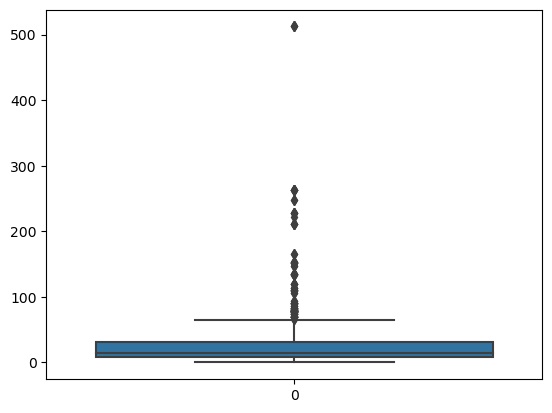

In [84]:
sns.boxplot(Titanic['fare'])

In [85]:
#seeing outlier rows
Q1 = Titanic['fare'].quantile(0.25)
Q3 = Titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = Titanic[(Titanic['fare'] < Q1 - whisker_width*IQR) | (Titanic['fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


In [86]:
Q1 = Titanic['fare'].quantile(0.25)
Q3 = Titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
Titanic['fare']=np.where(Titanic['fare']>upper_whisker,upper_whisker,np.where(Titanic['fare']<lower_whisker,lower_whisker,Titanic['fare']))

<Axes: >

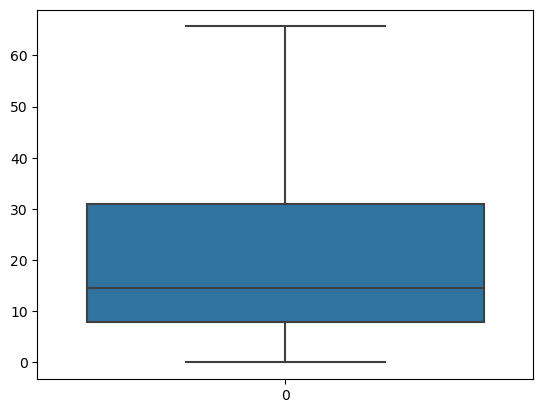

In [87]:
sns.boxplot(Titanic['fare'])

### 7. Check for Categorical columns and perform encoding:

In [88]:
#one hot
drop_col = ['age', 'sibsp', 'parch']
data_train_LE = Titanic.drop(drop_col, axis=1)
data_test_LE = Titanic.drop(drop_col, axis=1)
X_train_onehot = Titanic.drop(drop_col, axis=1)
X_test_onehot = Titanic.drop(drop_col, axis=1)

In [89]:
X_train_onehot.head()
columns = ['sex','embarked','pclass']

for col in columns:
    X_train_onehot = pd.concat([X_train_onehot, pd.get_dummies(X_train_onehot[col], drop_first = True)], axis =1)
    X_test_onehot = pd.concat([X_test_onehot, pd.get_dummies(X_test_onehot[col], drop_first = True)], axis =1)
    

In [90]:
X_train_onehot = X_train_onehot.drop(columns, axis=1)
X_test_onehot = X_test_onehot.drop(columns, axis=1)
X_train_onehot.head()

,survived,fare,class,who,adult_male,deck,embark_town,alive,alone,male,Cherbourg,Q,S,2,3
0,0,7.2500,Third,man,True,C,Southampton,no,False,1,0,0,1,0,1
1,1,65.6344,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0,0
2,1,7.9250,Third,woman,False,C,Southampton,yes,True,0,0,0,1,0,1
3,1,53.1000,First,woman,False,C,Southampton,yes,False,0,0,0,1,0,0
4,0,8.0500,Third,man,True,C,Southampton,no,True,1,0,0,1,0,1


In [91]:
#label encoder
le = preprocessing.LabelEncoder()
X_train_lab = Titanic.drop(drop_col, axis=1)
X_test_lab = Titanic.drop(drop_col, axis=1)
columns = ['sex', 'embarked']

for col in columns:
    le.fit(Titanic[col])
    X_train_lab[col] = le.transform(X_train_lab[col])
    X_test_lab[col] = le.transform(X_test_lab[col])
    
X_test_lab.head()

,survived,pclass,sex,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,7.2500,3,Third,man,True,C,Southampton,no,False
1,1,1,0,65.6344,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,7.9250,3,Third,woman,False,C,Southampton,yes,True
3,1,1,0,53.1000,3,First,woman,False,C,Southampton,yes,False
4,0,3,1,8.0500,3,Third,man,True,C,Southampton,no,True


### 8. Split the data into dependent and independent variables:

In [92]:
X = Titanic.drop('survived', axis=1)  # Independent variables (features)
y = Titanic['survived']  # Dependent variable (target)

### 9. Scale the independent variables:

In [93]:
numerical_cols = ['age', 'fare']  # numerical columns
categorical_cols = ['sex', 'embarked']  # categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing steps
X_scaled = preprocessor.fit_transform(X)

### 10. Split the data into training and testing:

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)